In [1]:
import pandas as pd


In [36]:
df = pd.read_csv('reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [37]:
df.Rating.value_counts()

1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64

In [38]:
df.Rating.isnull().value_counts()

False    705
True     145
Name: Rating, dtype: int64

In [56]:
df.Review.isnull().value_counts()

False    705
Name: Review, dtype: int64

In [47]:
df.Rating[845]

nan

In [50]:
df.Review[845]

"I ordered two venti frappacino's without whipped cream (as my daughter and I are allergic to whipped cream).  The representative made them with whipped cream, then realized the mistake, scraped the cream off and handed them to me. This was very unsatisfactory.  I felt she should have made two fresh drinks. "

In [53]:
df = df.dropna(subset=['Rating'])

In [54]:
df['good_bad_review'] = df.Rating.apply(lambda x: 1 if x >= 3.0 else 0)
df.head()

,name,location,Date,Rating,Review,Image_Links,good_bad_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1


In [62]:
import spacy
nlp = spacy.load("en_core_web_lg") 

In [90]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct or token.is_stop or token.like_url or token.ent_type_=='PERSON':
            continue
        filtered_tokens.append(token.lemma_.lower())
    return " ".join(filtered_tokens)

In [82]:
df.Review[0]

'Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available.'

In [91]:
preprocess(df.Review[0])

'amber starbucks southwest parkway warm welcoming smile voice greet drive customer service spot order right smile actually 5 star available'

In [92]:
df['clean_review'] = df['Review'].apply(lambda x: preprocess(x))

In [93]:
df.head()

,name,location,Date,Rating,Review,Image_Links,good_bad_review,clean_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1,amber starbucks southwest parkway warm welcomi...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],1,starbucks fire station 436 altamonte springs f...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,1,want way recognize starbucks employee franklin...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],1,friend starbucks card work thankful worker pay...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,1,kick drink 5 cup warm water work instacart rig...


In [94]:
df.clean_review[2]

'want way recognize starbucks employee franklin park location run late work place order wrong location order smile 60 second thank soo have bad morning people like world well place'

In [95]:
df.Rating.value_counts()

1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64

In [96]:
df.good_bad_review.value_counts()

0    550
1    155
Name: good_bad_review, dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer

from matplotlib import pyplot as plt
import seaborn as sn

In [97]:
X = df.clean_review
y = df.good_bad_review

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1, 
    stratify=df.good_bad_review, 
    random_state=20
    )

In [165]:
clf = Pipeline([
    ('bow', CountVectorizer()),
    ('log regression', LogisticRegression())
])
clf.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('log regression', LogisticRegression())])

In [166]:
clf.score(X_train,y_train)

1.0

In [167]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        55
           1       0.69      0.56      0.62        16

    accuracy                           0.85        71
   macro avg       0.79      0.74      0.76        71
weighted avg       0.84      0.85      0.84        71



In [168]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  4],
       [ 7,  9]], dtype=int64)

Text(33.0, 0.5, 'true')

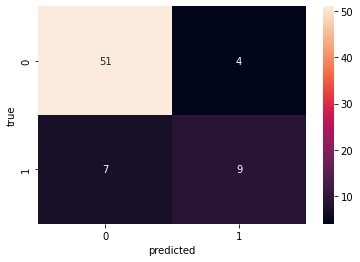

In [169]:
sn.heatmap(cm, annot=True,)
plt.xlabel('predicted')
plt.ylabel('true')